In [1]:
from scipy import *
import numpy as np
from pylab import *
import os
from astropy.io import fits
%matplotlib inline

In [3]:
######## check TT, Pk (z=0), Clkk (z=1) from class vs camb
ombh2 = 0.02247
omch2 = 0.11923

# LCDM parameters
A_s = 2.10732e-9
h=0.677
OmegaB = ombh2/h**2#0.046
OmegaM = omch2/h**2#0.309167
n_s = 0.96824
tau = 0.054 ## only for primary CMB, not used for now, for simplicity

### accuracy parameters
lmax=5000

In [31]:
##########################
####### class ############
##########################

## https://github.com/lesgourg/class_public/blob/master/explanatory.ini
# 1.a) list of output spectra requested:
# - 'tCl' for temperature Cls,
# - 'pCl' for polarization Cls,
# - 'lCl' for CMB lensing potential Cls,
# - 'nCl' (or 'dCl') for density number count Cls,
# - 'sCl' for galaxy lensing potential Cls,
# - 'mPk' for total matter power spectrum P(k) infered from gravitational potential,
# - 'dTk' (or 'mTk') for density transfer functions for each species,
# - 'vTk' for velocity transfer function for each species.

# import classy module
from classy import Class
# create instance of the class "Class"
LambdaCDM = Class()
LambdaCDM.set({'omega_b':ombh2,'omega_cdm':omch2,'h':h,'A_s':A_s,'n_s':n_s})
LambdaCDM.set({'output':'lCl,mPk,sCl',
               #'lensing':'yes',
               'lensing':'no',
               'P_k_max_1/Mpc':10.0,
               'z_pk':0,
               'reio_parametrization':'reio_none',
               'l_switch_limber':100,
               'selection':'dirac',
               'selection_mean':2.0,
               'l_max_lss':lmax,
               'perturb_sampling_stepsize':0.01,
               'non linear':'halofit'
              })

LambdaCDM_linear = Class()
LambdaCDM_linear.set({'omega_b':ombh2,'omega_cdm':omch2,'h':h,'A_s':A_s,'n_s':n_s})
LambdaCDM_linear.set({'output':'lCl,mPk,sCl',
               #'lensing':'yes',
               'lensing':'no',
               'P_k_max_1/Mpc':10.0,
               'z_pk':0,
               'reio_parametrization':'reio_none',
               'l_switch_limber':100,
               'selection':'dirac',
               'selection_mean':2.0,
               'l_max_lss':lmax,
               'perturb_sampling_stepsize':0.01
              })
# run class
LambdaCDM.compute()
LambdaCDM_linear.compute()


In [41]:
# get Clkk
cls2=LambdaCDM.density_cl(lmax)
print cls2.viewkeys()
ell=cls2['ell'][2:]
clphiphi=cls2['ll'][0][2:]
clkk=1.0/4 * (ell+2.0)*(ell+1.0)*(ell)*(ell-1.0)*clphiphi

# get Clkk linear
cls2_lin=LambdaCDM_linear.density_cl(lmax)
#print cls2.viewkeys()
ell=cls2_lin['ell'][2:]
clphiphi_lin=cls2_lin['ll'][0][2:]
clkk_lin=1.0/4 * (ell+2.0)*(ell+1.0)*(ell)*(ell-1.0)*clphiphi_lin


dict_keys(['ll', 'ell'])


In [34]:
data=load("crowcanyon_zs2.0_4096_cls.npz")
ell_sim, cl_sim=data['ell'], data['cl']

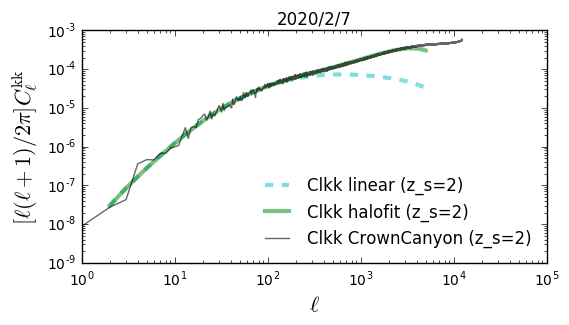

In [43]:
figure(0, figsize=(6,3))
xscale('log');yscale('log');#xlim(2,2500)
xlabel(r'$\ell$',fontsize=16)
ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{kk}$',fontsize=16)
plot(ell,clkk_lin*ell*(ell+1)/2./pi,'c--',lw=3,alpha=0.5,label='Clkk linear (z_s=2)')
plot(ell,clkk*ell*(ell+1)/2./pi,'g-',lw=3,alpha=0.5,label='Clkk halofit (z_s=2)')
plot(ell_sim,cl_sim*ell_sim*(ell_sim+1)/2./pi,'k-',lw=1,alpha=0.6,label='Clkk CrownCanyon (z_s=2)')
#plot(ls2, clkk_camb,'b-',label='camb')
legend(loc=0,frameon=0)
title('2020/2/7')